In [1]:
# Dependencies and Setup
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
# File to Load 
cause_of_death_data = Path("Resources/cause_of_deaths.csv")
air_quality_data = Path("Resources/air-pollution.csv")

#Read csv file
cause_of_death_df = pd.read_csv(cause_of_death_data)
air_quality_df = pd.read_csv(air_quality_data)


In [3]:
#print csv file
cause_of_death_df

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,Zimbabwe,ZWE,2015,1439,754,215,3019,2518,770,1302,...,3176,2108,381,2990,2373,2751,1956,4202,632,146
6116,Zimbabwe,ZWE,2016,1457,767,219,3056,2050,801,1342,...,3259,2160,393,3027,2436,2788,1962,4264,648,146
6117,Zimbabwe,ZWE,2017,1460,781,223,2990,2116,818,1363,...,3313,2196,398,2962,2473,2818,2007,4342,654,144
6118,Zimbabwe,ZWE,2018,1450,795,227,2918,2088,825,1396,...,3381,2240,400,2890,2509,2849,2030,4377,657,139


In [4]:
#delete extra columns from the list
delete_death_columns = ["Meningitis", "Alzheimer's Disease and Other Dementias", "Parkinson's Disease", "Nutritional Deficiencies", 
                        "Malaria", "Drowning", "Interpersonal Violence","Diabetes Mellitus","Chronic Kidney Disease","Poisonings", 
                        "Protein-Energy Malnutrition","Road Injuries","Cirrhosis and Other Chronic Liver Diseases","Digestive Diseases",
                        "Fire, Heat, and Hot Substances","Acute Hepatitis","Maternal Disorders","HIV/AIDS","Drug Use Disorders",
                        "Tuberculosis","Neonatal Disorders","Alcohol Use Disorders","Self-harm",
                        "Exposure to Forces of Nature","Exposure to Forces of Nature", "Environmental Heat and Cold Exposure", "Neoplasms",
                        "Conflict and Terrorism", "Diarrheal Diseases","Cardiovascular Diseases"]
cause_of_death_df.drop(columns = delete_death_columns, inplace = True)

#Rename the country column
cause_of_death_df = cause_of_death_df.rename(columns={'Country/Territory': 'Country'})

#filter cause of death from 2014 to 2019
cause_of_death_filtered = cause_of_death_df[(cause_of_death_df['Year'] >= 2014) & (cause_of_death_df['Year'] <= 2019)]
cause_of_death_filtered

,Country,Code,Year,Lower Respiratory Infections,Chronic Respiratory Diseases
24,Afghanistan,AFG,2014,21750,6851
25,Afghanistan,AFG,2015,21016,6835
26,Afghanistan,AFG,2016,20601,6894
27,Afghanistan,AFG,2017,19868,6982
28,Afghanistan,AFG,2018,19014,7036
...,...,...,...,...,...
6115,Zimbabwe,ZWE,2015,12974,2751
6116,Zimbabwe,ZWE,2016,13024,2788
6117,Zimbabwe,ZWE,2017,12961,2818
6118,Zimbabwe,ZWE,2018,12860,2849


In [5]:
# filter data based on the year
cause_of_death = cause_of_death_filtered.pivot(index = 'Country', columns = 'Year', values = ['Lower Respiratory Infections','Chronic Respiratory Diseases'])
cause_of_death.reset_index(inplace = True)
cause_of_death

Country Lower Respiratory Infections                              \
Year                                         2014   2015   2016   2017   2018   
0        Afghanistan                        21750  21016  20601  19868  19014   
1            Albania                          401    418    430    440    448   
2            Algeria                         5543   5634   5567   5605   5704   
3     American Samoa                           11     11     12     12     12   
4            Andorra                           18     19     19     20     20   
..               ...                          ...    ...    ...    ...    ...   
199        Venezuela                         4967   5018   5094   5154   5251   
200          Vietnam                        21646  21572  21492  21460  21408   
201            Yemen                         6613   6585   6532   6461   6350   
202           Zambia                         9292   8921   8602   8494   8259   
203         Zimbabwe                        12888  12974  13024  12961  12860   

            Chronic Respiratory Diseases                                     
Year   2019                         2014   2015   2016   2017   2018   2019  
0     18697                         6851   6835   6894   6982   7036   7082  
1       457                          702    737    759    779    797    815  
2      5786                         6536   6739   6903   7100   7320   7528  
3        12                           21     22     22     22     23     23  
4        20                           35     36     37     38     39     39  
..      ...                          ...    ...    ...    ...    ...    ...  
199    5555                         5285   5506   5813   6105   6427   7062  
200   21345                        33943  34289  34806  35312  35785  36229  
201    6289                         4825   4981   5162   5368   5569   5738  
202    8190                         2180   2214   2249   2302   2341   2388  
203   12897                         2715   2751   2788   2818   2849   2891  

[204 rows x 13 columns]

In [6]:
#print csv file
air_quality_df

,Country,Year,Nitrogen Oxide,Sulphur Dioxide,Carbon Monoxide,Organic Carbon,NMVOCs,Black Carbon,Ammonia
0,Afghanistan,1750,555.42,139.42,142073.31,5456.88,13311.29,1633.03,7628.36
1,Afghanistan,1760,578.45,145.09,147859.24,5679.12,13853.64,1699.54,7946.02
2,Afghanistan,1770,602.42,150.99,153867.41,5909.88,14416.85,1768.60,8276.90
3,Afghanistan,1780,627.37,157.11,160104.42,6149.44,15001.56,1840.29,8621.53
4,Afghanistan,1790,653.34,163.46,166576.77,6398.04,15608.38,1914.68,8980.49
...,...,...,...,...,...,...,...,...,...
47530,Zimbabwe,2015,83842.10,67231.29,1610636.44,108275.48,299713.47,30912.24,112425.84
47531,Zimbabwe,2016,76234.43,59452.70,1632515.11,111975.72,302718.32,31570.53,115539.98
47532,Zimbabwe,2017,74381.80,53891.39,1657688.51,114613.20,306905.62,32344.41,118254.66
47533,Zimbabwe,2018,73062.53,51072.78,1653664.68,114583.51,306860.21,32365.56,119965.76


In [7]:
#delete columns we dont need
delete_air_columns = ["NMVOCs", "Organic Carbon", "Black Carbon"]
air_quality_df.drop(columns = delete_air_columns, inplace = True)

#filter the data from 2014 - 2019
air_quality_filtered = air_quality_df[(air_quality_df['Year'] >= 2014) & (air_quality_df['Year'] <= 2019)]
air_quality_filtered

,Country,Year,Nitrogen Oxide,Sulphur Dioxide,Carbon Monoxide,Ammonia
219,Afghanistan,2014,389917.48,41563.12,1001553.30,164079.73
220,Afghanistan,2015,436829.45,80922.94,1109626.58,168776.20
221,Afghanistan,2016,400498.44,150819.17,971032.80,172990.14
222,Afghanistan,2017,420438.08,177784.83,985991.89,177127.75
223,Afghanistan,2018,456372.99,322137.87,1032861.60,181148.84
...,...,...,...,...,...,...
47530,Zimbabwe,2015,83842.10,67231.29,1610636.44,112425.84
47531,Zimbabwe,2016,76234.43,59452.70,1632515.11,115539.98
47532,Zimbabwe,2017,74381.80,53891.39,1657688.51,118254.66
47533,Zimbabwe,2018,73062.53,51072.78,1653664.68,119965.76


In [8]:
# filter data based on the year
air_quality = air_quality_filtered.pivot(index = 'Country', columns = 'Year', values = ['Nitrogen Oxide','Sulphur Dioxide', 'Carbon Monoxide', 'Ammonia'])
air_quality.reset_index(inplace = True)
air_quality

Country Nitrogen Oxide                                          \
Year                           2014          2015         2016         2017   
0        Afghanistan   3.899175e+05  4.368295e+05    400498.44    420438.08   
1             Africa   6.696882e+06  6.656081e+06   6744110.34   6723437.39   
2            Albania   2.678247e+04  2.480939e+04     23747.37     24537.42   
3            Algeria   4.352168e+05  4.642893e+05    453794.50    451851.01   
4     American Samoa   3.495700e+02  3.351300e+02       339.13       261.39   
..               ...            ...           ...          ...          ...   
225   Western Sahara   1.128070e+03  1.103430e+03      1043.60      1061.76   
226            World   1.054730e+08  1.025216e+08  99941230.77  99020688.24   
227            Yemen   1.138390e+05  6.728147e+04     56391.61     54560.69   
228           Zambia   5.263396e+04  5.530683e+04     55415.69     57442.38   
229         Zimbabwe   8.404431e+04  8.384210e+04     76234.43     74381.80   

                               Sulphur Dioxide                            ...  \
Year         2018         2019            2014         2015         2016  ...   
0       456372.99    480669.59        41563.12     80922.94    150819.17  ...   
1      6730778.42   6782872.66      6500779.42   6329183.44   6354424.13  ...   
2        23535.53     23371.85        12605.99      8926.12      8806.97  ...   
3       468036.63    487160.68        62173.92     67203.82     64911.92  ...   
4          259.65       245.68          541.51       551.45       554.42  ...   
..            ...          ...             ...          ...          ...  ...   
225       1063.18      1064.06          102.47       103.22       104.29  ...   
226   98278190.71  97207281.40     86313700.87  81816389.25  76963025.65  ...   
227      53771.97     55096.00        92776.71     47999.06     39497.47  ...   
228      57038.38     56674.37       762444.09    984625.08   1037176.56  ...   
229      73062.53     70779.92        69261.00     67231.29     59452.70  ...   

     Carbon Monoxide                                                Ammonia  \
Year            2016          2017          2018          2019         2014   
0       9.710328e+05  9.859919e+05  1.032862e+06  1.055394e+06    164079.73   
1       9.625443e+07  9.841437e+07  9.892721e+07  9.947575e+07   7609391.34   
2       5.338924e+04  5.247484e+04  5.092729e+04  5.095350e+04     35484.88   
3       6.744126e+05  6.767884e+05  6.826722e+05  7.195098e+05    104813.95   
4       7.611500e+02  7.009000e+02  6.981300e+02  6.719900e+02       178.99   
..               ...           ...           ...           ...          ...   
225     2.210620e+03  2.217810e+03  2.213910e+03  2.210000e+03      2109.06   
226     5.442772e+08  5.373715e+08  5.321118e+08  5.272669e+08  58606107.68   
227     1.607372e+05  1.572828e+05  1.557181e+05  1.561796e+05     87979.56   
228     1.831985e+06  1.867041e+06  1.883623e+06  1.899273e+06    138216.02   
229     1.632515e+06  1.657689e+06  1.653665e+06  1.647792e+06    110911.29   

                                                                       
Year         2015         2016         2017         2018         2019  
0       168776.20    172990.14    177127.75    181148.84    185026.85  
1      7758921.20   7949626.79   8148424.49   8306104.50   8465804.00  
2        43912.12     43935.56     44018.38     44137.13     44259.67  
3       106675.60    108459.22    110253.00    112036.47    113819.64  
4          179.03       179.30       177.98       178.20       178.32  
..            ...          ...          ...          ...          ...  
225       2130.31      2172.34      2215.28      2258.33      2301.05  
226   59122753.08  59699829.94  60339839.82  60876407.88  61420591.28  
227      88808.37     90795.88     92849.06     94898.56     96966.02  
228     143630.65    148085.06    152747.47    156400.75    160141.44  
229     112425.84    115539.98    11825

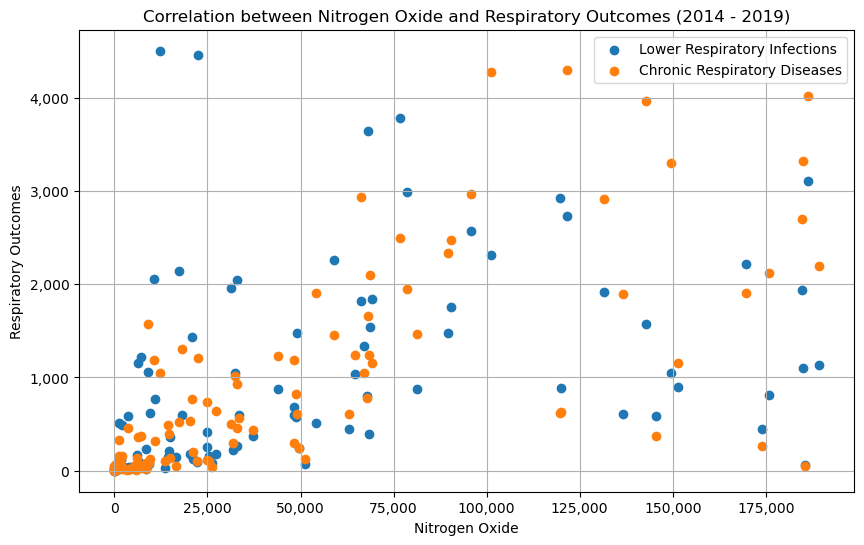

For the year 2016:
Correlation coefficient between Lower Respiratory Infections and Nitrogen Oxide: 0.6231211943437903
Correlation coefficient between Chronic Respiratory Diseases and Nitrogen Oxide: 0.8705232186083935

For the year 2017:
Correlation coefficient between Lower Respiratory Infections and Nitrogen Oxide: 0.6426883682286464
Correlation coefficient between Chronic Respiratory Diseases and Nitrogen Oxide: 0.8738183047174892

For the year 2018:
Correlation coefficient between Lower Respiratory Infections and Nitrogen Oxide: 0.6526067804222714
Correlation coefficient between Chronic Respiratory Diseases and Nitrogen Oxide: 0.8732827236345511

For the year 2019:
Correlation coefficient between Lower Respiratory Infections and Nitrogen Oxide: 0.660468172651885
Correlation coefficient between Chronic Respiratory Diseases and Nitrogen Oxide: 0.8755155949510636

For the year 2014:
Correlation coefficient between Lower Respiratory Infections and Nitrogen Oxide: 0.5805248055148888
Co

In [9]:

# Initialize an empty dictionary to store correlation coefficients for each year
correlation_results = {}

# Iterate over the unique years in the data
years = set(air_quality_filtered['Year']) & set(cause_of_death_filtered['Year'])

for year in years:
    # Filter air quality data for the current year
    air_quality_year = air_quality_filtered[air_quality_filtered['Year'] == year]
    
    # Filter cause of death data for the current year
    cause_of_death_year = cause_of_death_filtered[cause_of_death_filtered['Year'] == year]

    # Merge the air quality and cause of death data frames based on 'Country' column
    merged_data = pd.merge(air_quality_year, cause_of_death_year, on='Country', how='inner')

    # Calculate correlation coefficient between 'Nitrogen Oxide' and 'Lower Respiratory Infections'
    correlation_lower = merged_data['Nitrogen Oxide'].corr(merged_data['Lower Respiratory Infections'])
    
    # Calculate correlation coefficient between 'Nitrogen Oxide' and 'Chronic Respiratory Diseases'
    correlation_chronic = merged_data['Nitrogen Oxide'].corr(merged_data['Chronic Respiratory Diseases'])

    # Store correlation coefficients for the current year
    correlation_results[year] = {'Correlation Lower Respiratory and Nitrogen': correlation_lower,
                                 'Correlation Chronic Respiratory and Nitrogen': correlation_chronic}

# Filter the merged data frame to include only entries with respiratory outcomes less than 5,000 and nitrogen oxide greater than 200,000
filtered_data = merged_data[(merged_data['Lower Respiratory Infections'] < 5000) & (merged_data['Chronic Respiratory Diseases'] < 5000) & (merged_data['Nitrogen Oxide'] < 200000)]

# Plot scatter plot for both lower and chronic respiratory infections vs. nitrogen oxide
plt.figure(figsize=(10, 6))

# Scatter plot for lower respiratory infections
plt.scatter(filtered_data['Nitrogen Oxide'], filtered_data['Lower Respiratory Infections'], label='Lower Respiratory Infections')

# Scatter plot for chronic respiratory diseases
plt.scatter(filtered_data['Nitrogen Oxide'], filtered_data['Chronic Respiratory Diseases'], label='Chronic Respiratory Diseases')

# Set labels and title
plt.xlabel('Nitrogen Oxide')
plt.ylabel('Respiratory Outcomes')
plt.title('Correlation between Nitrogen Oxide and Respiratory Outcomes (2014 - 2019)')
plt.legend()

# Format the y-axis ticks to show death rates in correct number format
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

plt.grid(True)
plt.show()


# Print correlation coefficients for each year
for year, correlations in correlation_results.items():
    print(f"For the year {year}:")
    print("Correlation coefficient between Lower Respiratory Infections and Nitrogen Oxide:", correlations['Correlation Lower Respiratory and Nitrogen'])
    print("Correlation coefficient between Chronic Respiratory Diseases and Nitrogen Oxide:", correlations['Correlation Chronic Respiratory and Nitrogen'])
    print()


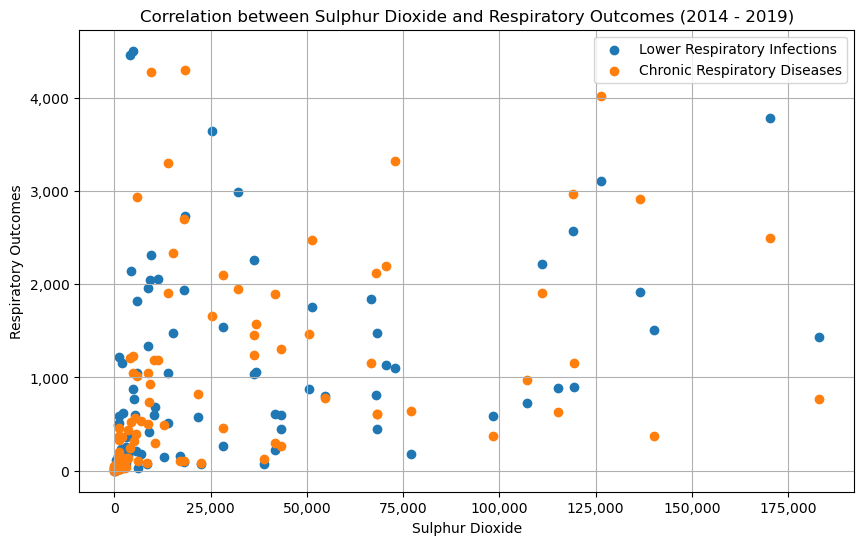

For the year 2016:
Correlation coefficient between Lower Respiratory Infections and Sulphur Dioxide: 0.6678138741296343
Correlation coefficient between Chronic Respiratory Diseases and Sulphur Dioxidee: 0.8829666324589249

For the year 2017:
Correlation coefficient between Lower Respiratory Infections and Sulphur Dioxide: 0.7084596339310815
Correlation coefficient between Chronic Respiratory Diseases and Sulphur Dioxidee: 0.8833328798482483

For the year 2018:
Correlation coefficient between Lower Respiratory Infections and Sulphur Dioxide: 0.7218471139601615
Correlation coefficient between Chronic Respiratory Diseases and Sulphur Dioxidee: 0.8835327340159207

For the year 2019:
Correlation coefficient between Lower Respiratory Infections and Sulphur Dioxide: 0.724331246061922
Correlation coefficient between Chronic Respiratory Diseases and Sulphur Dioxidee: 0.8791744487168172

For the year 2014:
Correlation coefficient between Lower Respiratory Infections and Sulphur Dioxide: 0.589252

In [10]:
# Initialize an empty dictionary to store correlation coefficients for each year
correlation_results = {}

# Iterate over the unique years in the data
years = set(air_quality_filtered['Year']) & set(cause_of_death_filtered['Year'])

for year in years:
    # Filter air quality data for the current year
    air_quality_year = air_quality_filtered[air_quality_filtered['Year'] == year]
    
    # Filter cause of death data for the current year
    cause_of_death_year = cause_of_death_filtered[cause_of_death_filtered['Year'] == year]

    # Merge the air quality and cause of death data frames based on 'Country' column
    merged_data = pd.merge(air_quality_year, cause_of_death_year, on='Country', how='inner')


    # Calculate correlation coefficient between 'Sulphur Dioxide' and 'Lower Respiratory Infections'
    correlation_lower = merged_data['Sulphur Dioxide'].corr(merged_data['Lower Respiratory Infections'])
    
    # Calculate correlation coefficient between 'Sulphur Dioxide' and 'Chronic Respiratory Diseases'
    correlation_chronic = merged_data['Sulphur Dioxide'].corr(merged_data['Chronic Respiratory Diseases'])

    # Store correlation coefficients for the current year
    correlation_results[year] = {'Correlation Lower Respiratory and Sulphur': correlation_lower,
                                 'Correlation Chronic Respiratory and Sulphur': correlation_chronic}

# Filter the merged data frame to include only entries with respiratory outcomes less than 5,000 and Sulphur Dioxide greater than 200,000
filtered_data = merged_data[(merged_data['Lower Respiratory Infections'] < 5000) & (merged_data['Chronic Respiratory Diseases'] < 5000) & (merged_data['Sulphur Dioxide'] < 200000)]

# Plot scatter plot for both lower and chronic respiratory infections vs. Sulphur Dioxide
plt.figure(figsize=(10, 6))

# Scatter plot for lower respiratory infections
plt.scatter(filtered_data['Sulphur Dioxide'], filtered_data['Lower Respiratory Infections'], label='Lower Respiratory Infections')

# Scatter plot for chronic respiratory diseases
plt.scatter(filtered_data['Sulphur Dioxide'], filtered_data['Chronic Respiratory Diseases'], label='Chronic Respiratory Diseases')

# Set labels and title
plt.xlabel('Sulphur Dioxide')
plt.ylabel('Respiratory Outcomes')
plt.title('Correlation between Sulphur Dioxide and Respiratory Outcomes (2014 - 2019)')
plt.legend()

# Format the y-axis ticks to show death rates in correct number format
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

plt.grid(True)
plt.show()


# Print correlation coefficients for each year
for year, correlations in correlation_results.items():
    print(f"For the year {year}:")
    print("Correlation coefficient between Lower Respiratory Infections and Sulphur Dioxide:", correlations['Correlation Lower Respiratory and Sulphur'])
    print("Correlation coefficient between Chronic Respiratory Diseases and Sulphur Dioxidee:", correlations['Correlation Chronic Respiratory and Sulphur'])
    print()


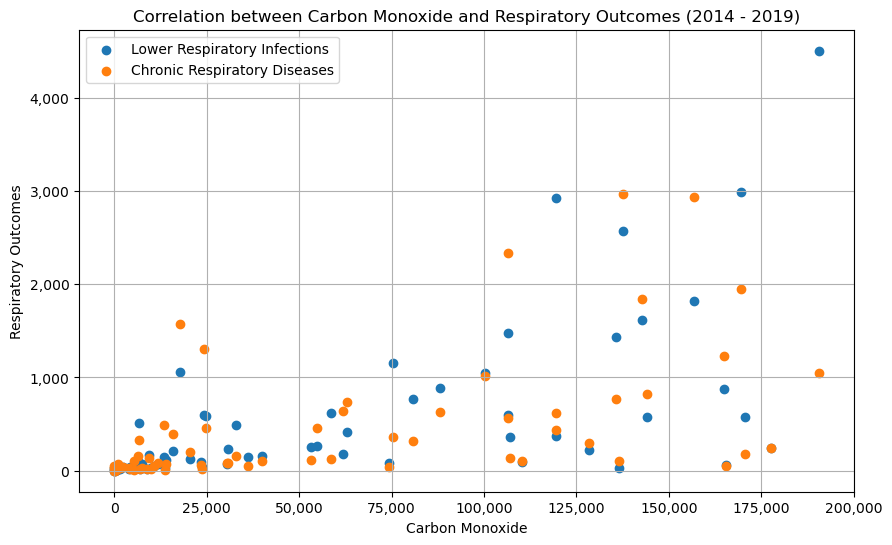

For the year 2016:
Correlation coefficient between Lower Respiratory Infections and Carbon Monoxide: 0.6453193331161972
Correlation coefficient between Chronic Respiratory Diseases and Carbon Monoxide: 0.8762827511654268

For the year 2017:
Correlation coefficient between Lower Respiratory Infections and Carbon Monoxide: 0.6587246052132693
Correlation coefficient between Chronic Respiratory Diseases and Carbon Monoxide: 0.8727012627157894

For the year 2018:
Correlation coefficient between Lower Respiratory Infections and Carbon Monoxide: 0.6613869811353504
Correlation coefficient between Chronic Respiratory Diseases and Carbon Monoxide: 0.8678579496825525

For the year 2019:
Correlation coefficient between Lower Respiratory Infections and Carbon Monoxide: 0.6672306897809313
Correlation coefficient between Chronic Respiratory Diseases and Carbon Monoxide: 0.869526278693765

For the year 2014:
Correlation coefficient between Lower Respiratory Infections and Carbon Monoxide: 0.6020492220

In [11]:
# Initialize an empty dictionary to store correlation coefficients for each year
correlation_results = {}

# Iterate over the unique years in the data
years = set(air_quality_filtered['Year']) & set(cause_of_death_filtered['Year'])

for year in years:
    # Filter air quality data for the current year
    air_quality_year = air_quality_filtered[air_quality_filtered['Year'] == year]
    
    # Filter cause of death data for the current year
    cause_of_death_year = cause_of_death_filtered[cause_of_death_filtered['Year'] == year]

    # Merge the air quality and cause of death data frames based on 'Country' column
    merged_data = pd.merge(air_quality_year, cause_of_death_year, on='Country', how='inner')


    # Calculate correlation coefficient between 'Carbon Monoxide' and 'Lower Respiratory Infections'
    correlation_lower = merged_data['Carbon Monoxide'].corr(merged_data['Lower Respiratory Infections'])
    
    # Calculate correlation coefficient between 'Carbon Monoxide' and 'Chronic Respiratory Diseases'
    correlation_chronic = merged_data['Carbon Monoxide'].corr(merged_data['Chronic Respiratory Diseases'])

    # Store correlation coefficients for the current year
    correlation_results[year] = {'Correlation Lower Respiratory and Carbon Monoxide': correlation_lower,
                                 'Correlation Chronic Respiratory and Carbon Monoxide': correlation_chronic}

# Filter the merged data frame to include only entries with respiratory outcomes less than 5,000 and Carbon Monoxide less than 200,000
filtered_data = merged_data[(merged_data['Lower Respiratory Infections'] < 5000) & (merged_data['Chronic Respiratory Diseases'] < 5000) & (merged_data['Carbon Monoxide'] < 200000)]

# Plot scatter plot for both lower and chronic respiratory infections vs. Carbon Monoxide
plt.figure(figsize=(10, 6))

# Scatter plot for lower respiratory infections
plt.scatter(filtered_data['Carbon Monoxide'], filtered_data['Lower Respiratory Infections'], label='Lower Respiratory Infections')

# Scatter plot for chronic respiratory diseases
plt.scatter(filtered_data['Carbon Monoxide'], filtered_data['Chronic Respiratory Diseases'], label='Chronic Respiratory Diseases')

# Set labels and title
plt.xlabel('Carbon Monoxide')
plt.ylabel('Respiratory Outcomes')
plt.title('Correlation between Carbon Monoxide and Respiratory Outcomes (2014 - 2019)')
plt.legend()

# Format the y-axis ticks to show death rates in correct number format
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

plt.grid(True)
plt.show()


# Print correlation coefficients for each year
for year, correlations in correlation_results.items():
    print(f"For the year {year}:")
    print("Correlation coefficient between Lower Respiratory Infections and Carbon Monoxide:", correlations['Correlation Lower Respiratory and Carbon Monoxide'])
    print("Correlation coefficient between Chronic Respiratory Diseases and Carbon Monoxide:", correlations['Correlation Chronic Respiratory and Carbon Monoxide'])
    print()


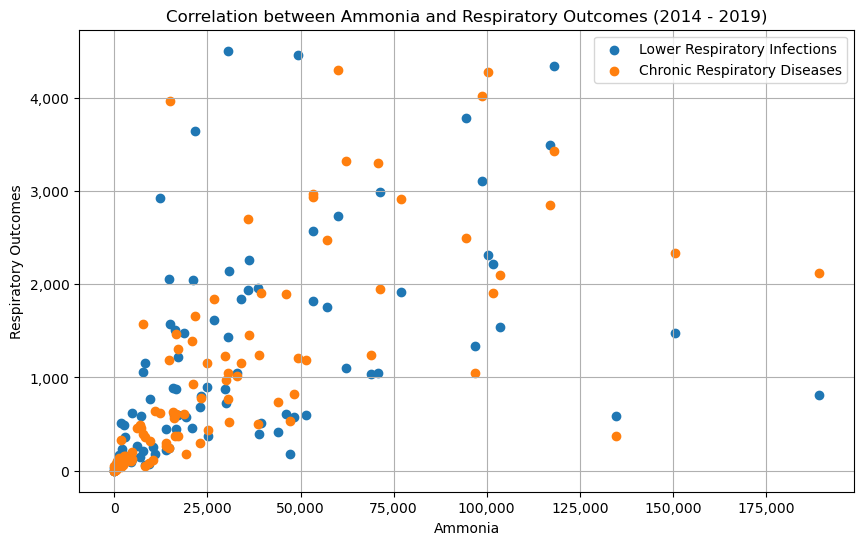

For the year 2016:
Correlation coefficient between Lower Respiratory Infections and Ammonia: 0.8214717615351705
Correlation coefficient between Chronic Respiratory Diseases and Ammonia: 0.9701498265765625

For the year 2017:
Correlation coefficient between Lower Respiratory Infections and Ammonia: 0.8296086993863125
Correlation coefficient between Chronic Respiratory Diseases and Ammonia: 0.96852408717244

For the year 2018:
Correlation coefficient between Lower Respiratory Infections and Ammonia: 0.8334015852373233
Correlation coefficient between Chronic Respiratory Diseases and Ammonia: 0.9672842002983694

For the year 2019:
Correlation coefficient between Lower Respiratory Infections and Ammonia: 0.8399050429611155
Correlation coefficient between Chronic Respiratory Diseases and Ammonia: 0.96829715521058

For the year 2014:
Correlation coefficient between Lower Respiratory Infections and Ammonia: 0.8037891798327634
Correlation coefficient between Chronic Respiratory Diseases and Amm

In [12]:
# Initialize an empty dictionary to store correlation coefficients for each year
correlation_results = {}

# Iterate over the unique years in the data
years = set(air_quality_filtered['Year']) & set(cause_of_death_filtered['Year'])

for year in years:
    # Filter air quality data for the current year
    air_quality_year = air_quality_filtered[air_quality_filtered['Year'] == year]
    
    # Filter cause of death data for the current year
    cause_of_death_year = cause_of_death_filtered[cause_of_death_filtered['Year'] == year]

    # Merge the air quality and cause of death data frames based on 'Country' column
    merged_data = pd.merge(air_quality_year, cause_of_death_year, on='Country', how='inner')


    # Calculate correlation coefficient between 'Carbon Monoxide' and 'Lower Respiratory Infections'
    correlation_lower = merged_data['Ammonia'].corr(merged_data['Lower Respiratory Infections'])
    
    # Calculate correlation coefficient between 'Carbon Monoxide' and 'Chronic Respiratory Diseases'
    correlation_chronic = merged_data['Ammonia'].corr(merged_data['Chronic Respiratory Diseases'])

    # Store correlation coefficients for the current year
    correlation_results[year] = {'Correlation Lower Respiratory and Ammonia': correlation_lower,
                                 'Correlation Chronic Respiratory and Ammonia': correlation_chronic}

# Filter the merged data frame to include only entries with respiratory outcomes less than 5,000 and Ammonia less than 200,000
filtered_data = merged_data[(merged_data['Lower Respiratory Infections'] < 5000) & (merged_data['Chronic Respiratory Diseases'] < 5000) & (merged_data['Ammonia'] < 200000)]

# Plot scatter plot for both lower and chronic respiratory infections vs. Ammonia
plt.figure(figsize=(10, 6))

# Scatter plot for lower respiratory infections
plt.scatter(filtered_data['Ammonia'], filtered_data['Lower Respiratory Infections'], label='Lower Respiratory Infections')

# Scatter plot for chronic respiratory diseases
plt.scatter(filtered_data['Ammonia'], filtered_data['Chronic Respiratory Diseases'], label='Chronic Respiratory Diseases')

# Set labels and title
plt.xlabel('Ammonia')
plt.ylabel('Respiratory Outcomes')
plt.title('Correlation between Ammonia and Respiratory Outcomes (2014 - 2019)')
plt.legend()

# Format the y-axis ticks to show death rates in correct number format
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

plt.grid(True)
plt.show()


# Print correlation coefficients for each year
for year, correlations in correlation_results.items():
    print(f"For the year {year}:")
    print("Correlation coefficient between Lower Respiratory Infections and Ammonia:", correlations['Correlation Lower Respiratory and Ammonia'])
    print("Correlation coefficient between Chronic Respiratory Diseases and Ammonia:", correlations['Correlation Chronic Respiratory and Ammonia'])
    print()
